In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./data/ionosphere/ionosphere.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
df.shape

(351, 35)

In [3]:
df['class'] = df['class'].map({'g': 1, 'b': 0})

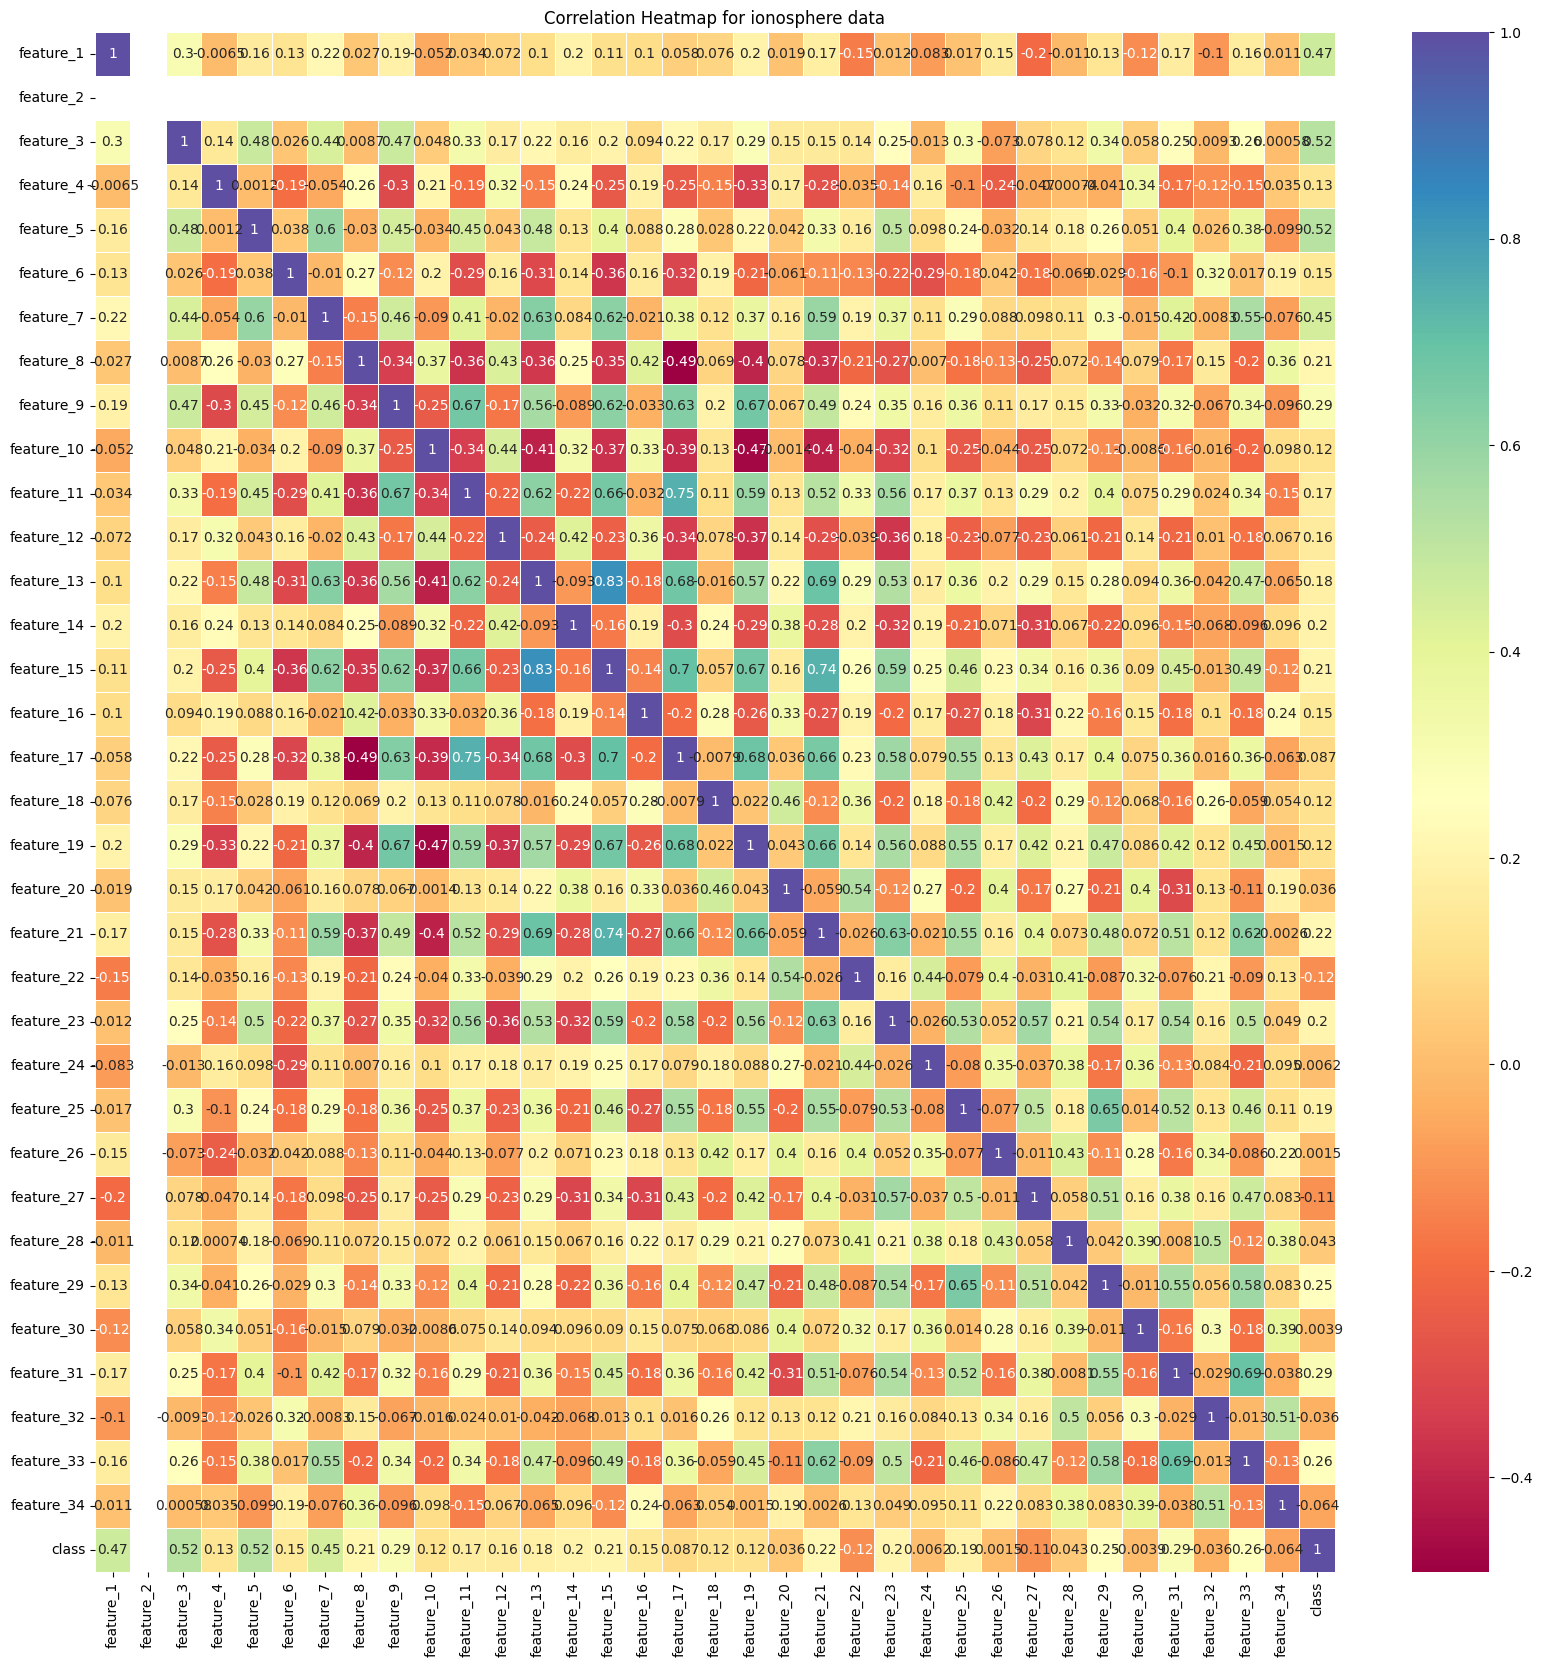

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", linewidths=0.4)
plt.title("Correlation Heatmap for ionosphere data")
plt.show()

In [5]:
threshold = 0.24
correlations_with_class = corr_matrix['class']
features_to_keep = correlations_with_class[abs(correlations_with_class) > threshold].index
_df = df[features_to_keep]

print("Features being kept:",  list(features_to_keep))
print("Total Features: ", len(df.columns))
print("# of Features dropped:", len(df.columns) - len(_df.columns))

df = _df

Features being kept: ['feature_1', 'feature_3', 'feature_5', 'feature_7', 'feature_9', 'feature_29', 'feature_31', 'feature_33', 'class']
Total Features:  35
# of Features dropped: 26


In [6]:
# Print min, max of every feature
min_features = [df.min().to_frame().T]
max_features = [df.max().to_frame().T]

outliers = pd.concat(min_features + max_features)
outliers = outliers[(outliers < -1) | (outliers > 1)].dropna(axis=1)
print("Outliers:", list(outliers.columns))


Outliers: []


#### No Need of scaling as data is already in range of -1 and 1

In [7]:
X = df.drop("class", axis=1).values
Y = df["class"]
Y = np.array(Y).reshape(-1, 1)

print(X.shape, Y.shape)


(351, 8) (351, 1)


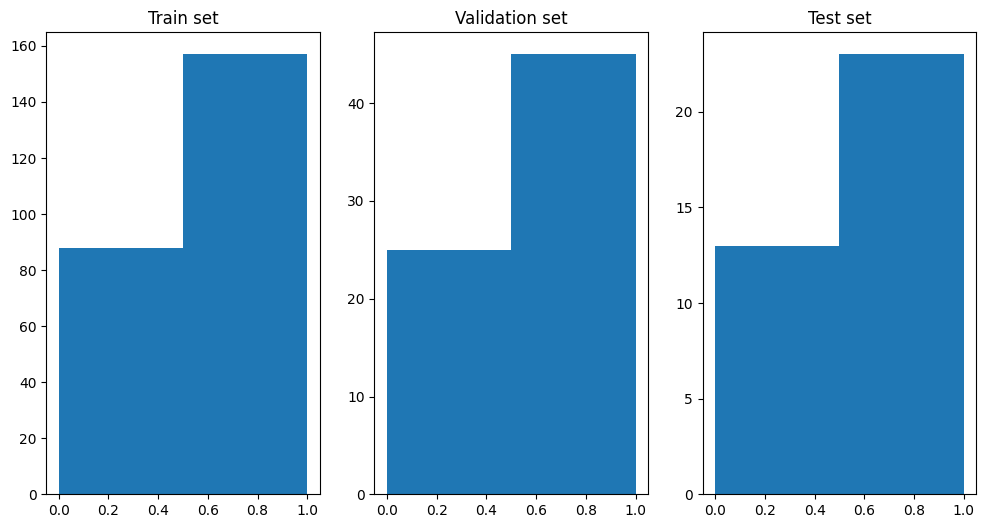

[-] Data split into 245 training samples, 70 validation samples, and 36 test samples


In [8]:
from src.experiment import Experiment

experiment2_zz = Experiment(X.shape[1], experiment_name="ionosphere_zz")
experiment2_zz.split_data(X,Y, use_sample=False, verbose=True)

In [9]:
print(experiment2_zz._X.shape)

(351, 8)


In [10]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import PauliFeatureMap

zz_feature_map = ZZFeatureMap(
    feature_dimension=experiment2_zz.X_train.shape[1], 
    reps=2
)

In [11]:
from src.ansatz import *

[+] Running experiment with ZZ Feature Map...
[+] Training ansatz_1 with 1 repetitions


[+] Validation results for ansatz_1 with 1 repetitions:
   [>] Accuracy: 0.6285714285714286
[+] Training ansatz_1 with 2 repetitions
[+] Validation results for ansatz_1 with 2 repetitions:
   [>] Accuracy: 0.7142857142857143
[+] Training ansatz_1 with 3 repetitions
[+] Validation results for ansatz_1 with 3 repetitions:
   [>] Accuracy: 0.7571428571428571
[+] Training ansatz_2 with 1 repetitions
[+] Validation results for ansatz_2 with 1 repetitions:
   [>] Accuracy: 0.6
[+] Training ansatz_2 with 2 repetitions
[+] Validation results for ansatz_2 with 2 repetitions:
   [>] Accuracy: 0.7
[+] Training ansatz_2 with 3 repetitions
[+] Validation results for ansatz_2 with 3 repetitions:
   [>] Accuracy: 0.7142857142857143
[+] Training ansatz_3 with 1 repetitions
[+] Validation results for ansatz_3 with 1 repetitions:
   [>] Accuracy: 0.6
[+] Training ansatz_3 with 2 repetitions
[+] Validation results for ansatz_3 with 2 repetitions:
   [>] Accuracy: 0.7428571428571429
[+] Training ansatz_3 

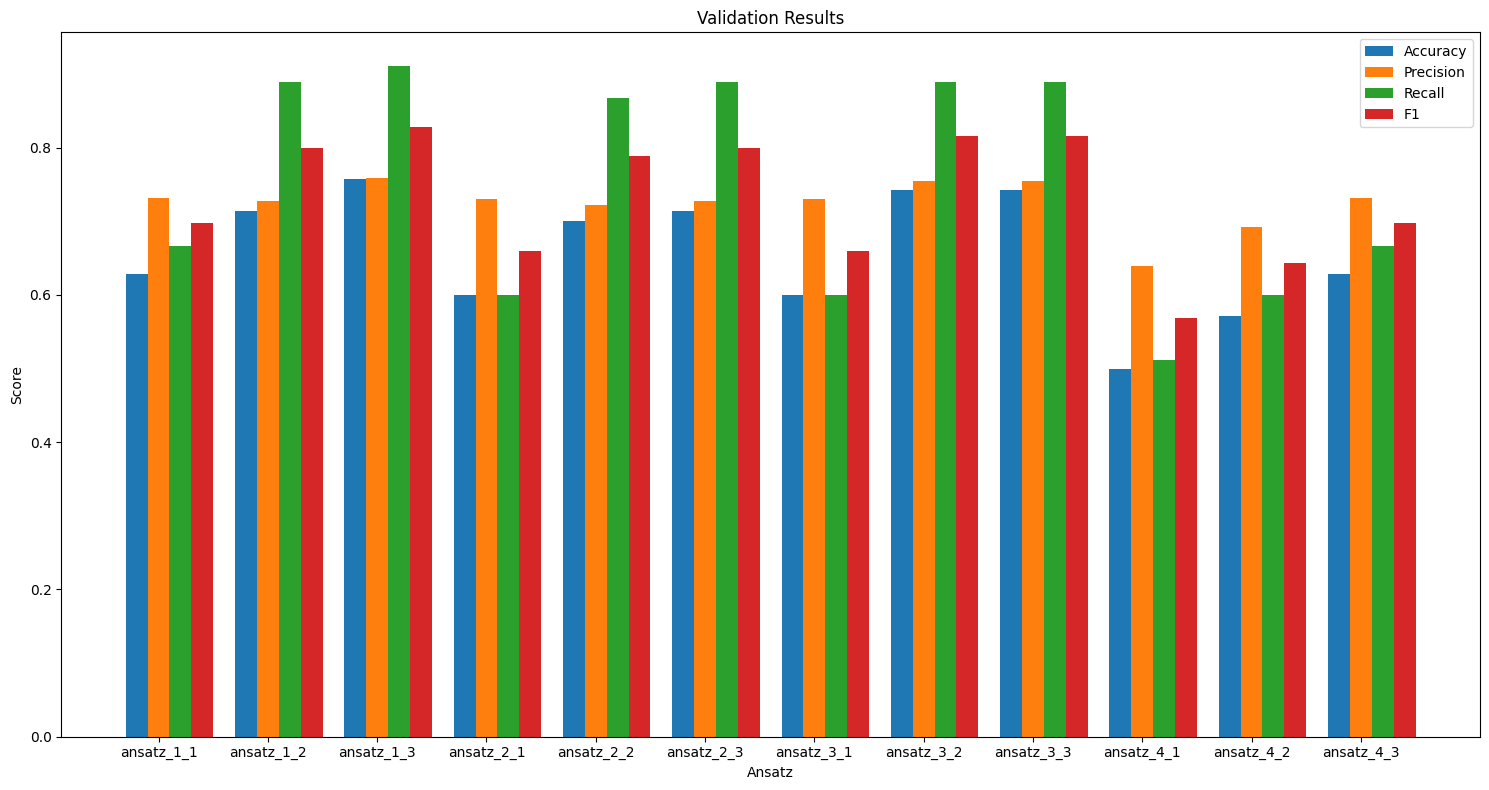

In [12]:
print("[+] Running experiment with ZZ Feature Map...")
experiment2_zz.run_experiment(zz_feature_map, [ansatz_1, ansatz_2, ansatz_3, ansatz_4], max_reps=3)
experiment2_zz.plot_results()

In [13]:
experiment2_zz.evaluate_best_on_test()

[-] Evaluating best model on test set: {'ansatz': 'ansatz_1', 'feature_map': 'ZZFeatureMap', 'reps': 3, 'accuracy': 0.757, 'precision': 0.759, 'recall': 0.911, 'f1': 0.828, 'time': 246.688}


{'ansatz': 'ansatz_1',
 'feature_map': 'ZZFeatureMap',
 'reps': 3,
 'accuracy': 0.556,
 'precision': 0.64,
 'recall': 0.696,
 'f1': 0.667,
 'time': 207.107}

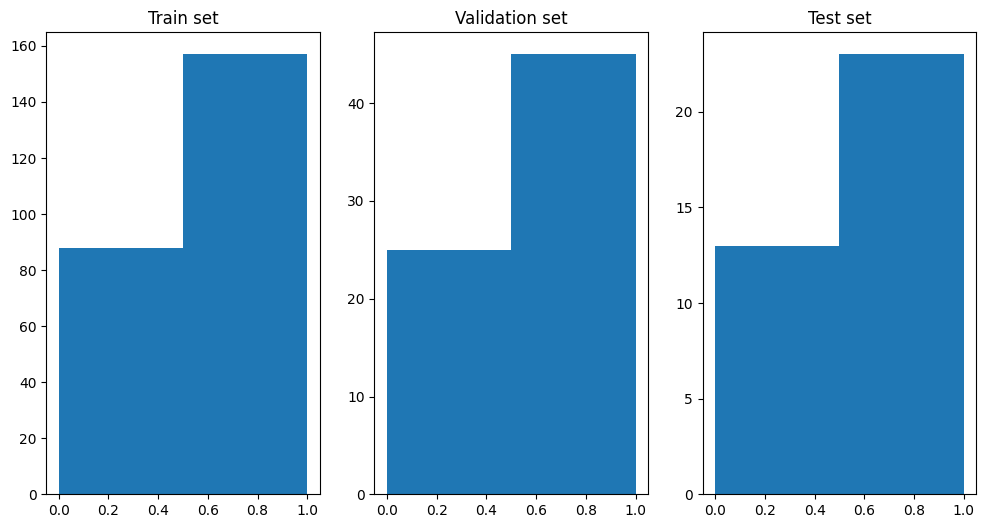

[-] Data split into 245 training samples, 70 validation samples, and 36 test samples


In [14]:
from src.experiment import Experiment

experiment2_pauli = Experiment(X.shape[1], experiment_name="ionosphere_pauli")
experiment2_pauli.split_data(X,Y, use_sample=False, verbose=True)

pauli_feature_map = PauliFeatureMap(
    feature_dimension=experiment2_pauli.X_train.shape[1], 
    reps=2, paulis=["Z", "YY"], 
    entanglement="full"
)

[+] Training ansatz_1 with 1 repetitions
[+] Validation results for ansatz_1 with 1 repetitions:
   [>] Accuracy: 0.5428571428571428
[+] Training ansatz_1 with 2 repetitions
[+] Validation results for ansatz_1 with 2 repetitions:
   [>] Accuracy: 0.6857142857142857
[+] Training ansatz_1 with 3 repetitions
[+] Validation results for ansatz_1 with 3 repetitions:
   [>] Accuracy: 0.7714285714285715
[+] Training ansatz_2 with 1 repetitions
[+] Validation results for ansatz_2 with 1 repetitions:
   [>] Accuracy: 0.4
[+] Training ansatz_2 with 2 repetitions
[+] Validation results for ansatz_2 with 2 repetitions:
   [>] Accuracy: 0.4857142857142857
[+] Training ansatz_2 with 3 repetitions
[+] Validation results for ansatz_2 with 3 repetitions:
   [>] Accuracy: 0.5285714285714286
[+] Training ansatz_3 with 1 repetitions
[+] Validation results for ansatz_3 with 1 repetitions:
   [>] Accuracy: 0.4142857142857143
[+] Training ansatz_3 with 2 repetitions
[+] Validation results for ansatz_3 with 2 

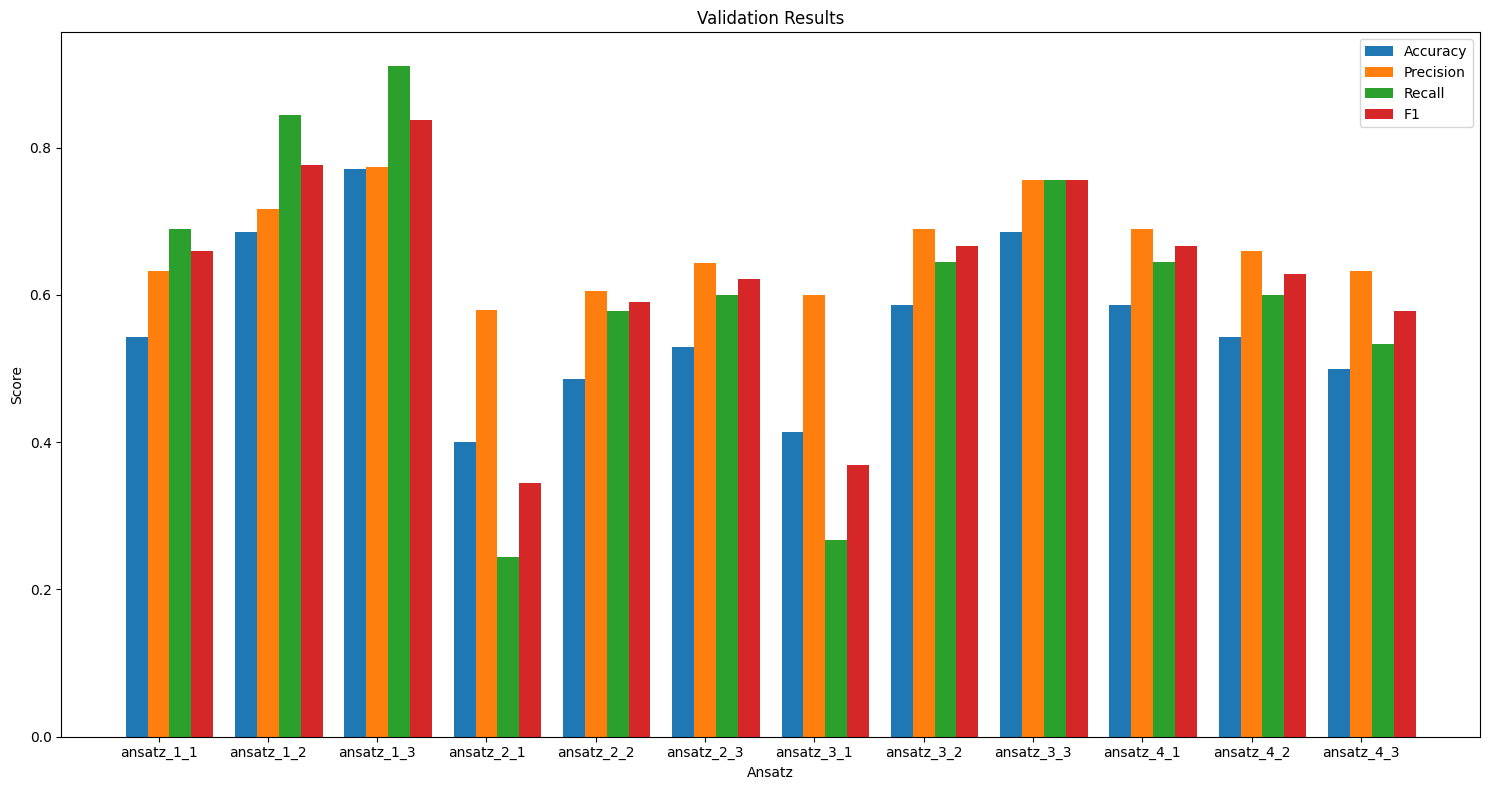

In [15]:
experiment2_pauli.run_experiment(pauli_feature_map, [ansatz_1, ansatz_2, ansatz_3, ansatz_4], max_reps=3)
experiment2_pauli.plot_results()

In [16]:
experiment2_pauli.evaluate_best_on_test()

[-] Evaluating best model on test set: {'ansatz': 'ansatz_1', 'feature_map': 'PauliFeatureMap', 'reps': 3, 'accuracy': 0.771, 'precision': 0.774, 'recall': 0.911, 'f1': 0.837, 'time': 325.048}


{'ansatz': 'ansatz_1',
 'feature_map': 'PauliFeatureMap',
 'reps': 3,
 'accuracy': 0.694,
 'precision': 0.731,
 'recall': 0.826,
 'f1': 0.776,
 'time': 223.003}